In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import odeint

In [3]:
L = 4 
N = 81  # Number of grid points
xspan = np.linspace(-L, L, N)  # Discretization of the x domain
dx = xspan[1] - xspan[0]  # Grid spacing

(81, 5)
[0.99937508+0.j 2.99688594+0.j 4.99206871+0.j 6.98617046+0.j
 8.9853595 +0.j]


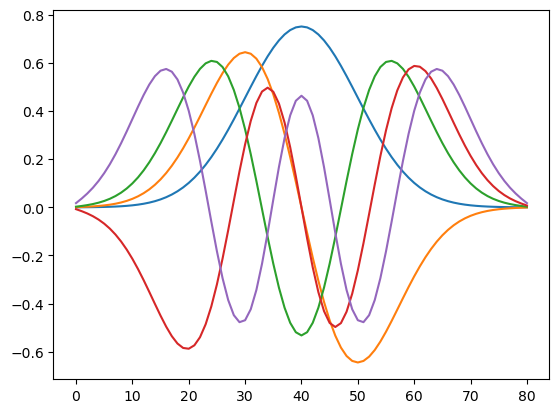

In [6]:
# Dirichlet matrices for B
B = np.zeros((N, N))
for j in range(N):
    B[j, j] = -2
for j in range(N - 1):
    B[j, j + 1] = 1
    B[j + 1, j] = 1
B1 = B / (dx**2)

# Linear operator
linL = -B1 + np.diag(xspan**2)

# Compute eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eig(linL)

# Sort eigenvalues and eigenfunctions
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenfunctions = eigenfunctions[:, idx]

# First 5 eigenfunctions and eigenvalues
eigenvalues = eigenvalues[:5]
eigenfunctions = eigenfunctions[:, :5]

# Normalize eigenfunctions
def normalize(phi, xspan):
    norm = np.sqrt(np.trapz(phi**2, xspan))
    return phi / norm

# Normalize the first five eigenfunctions
for n in range(5):
    eigenfunctions[:, n] = normalize(eigenfunctions[:, n], xspan)

# Store the eigenfunctions and eigenvalues
A1 = eigenfunctions 
A2 = eigenvalues  


# Eigenfunctions
print(np.shape(A1))

# Eigenvalues
print(A2)

#Plot Eigenfunctions
plt.plot(A1)


Eigenfunctions (A1):
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 2.00809873e-04  1.04484759e-03  3.67929975e-03 -1.00414458e-02
  -2.23236307e-02]
 [ 4.30156082e-04  2.21730345e-03  7.73454056e-03 -2.09085298e-02
  -4.60350766e-02]
 [ 7.17317954e-04  3.64348753e-03  1.25205202e-02 -3.33337814e-02
  -7.22539608e-02]
 [ 1.09551195e-03  5.45927333e-03  1.83955013e-02 -4.79931649e-02
  -1.01866468e-01]
 [ 1.60473602e-03  7.81897191e-03  2.57361870e-02 -6.55188467e-02
  -1.35519814e-01]
 [ 2.29450291e-03  1.09021677e-02  3.49447367e-02 -8.64923304e-02
  -1.73586769e-01]
 [ 3.22658364e-03  1.49189268e-02  4.64483636e-02 -1.11420508e-01
  -2.16109347e-01]
 [ 4.47779363e-03  2.01132515e-02  6.06913914e-02 -1.40696653e-01
  -2.62731085e-01]
 [ 6.14277971e-03  2.67643989e-02  7.81193419e-02 -1.74548684e-01
  -3.12628553e-01]
 [ 8.33669748e-03  3.51855024e-02  9.91546357e-02 -2.12977914e-01
  -3.64454312e-01]
 [ 1.11976031e-02  4.57188263e-02  1.2416378

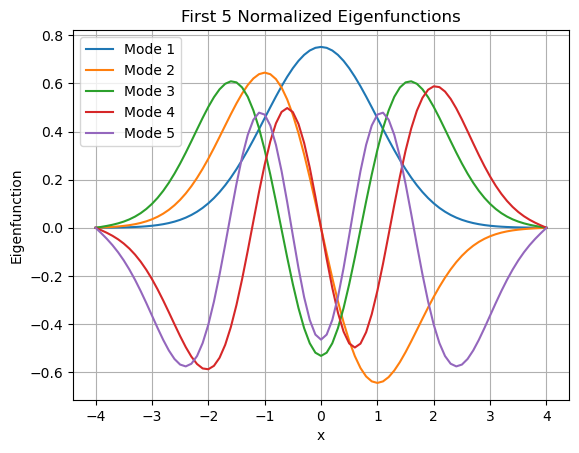

In [1]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Define constants
L = 4 
N = 81  # Number of grid points
xspan = np.linspace(-L, L, N)  # Discretization of the x domain
dx = xspan[1] - xspan[0]  # Grid spacing 

# Dirichlet matrices for B (Second-derivative operator with central differences)
B = np.zeros((N, N))
for j in range(1, N-1):
    B[j, j] = -2
    B[j, j-1] = 1
    B[j, j+1] = 1
B1 = B / (dx**2)

# Linear operator for the harmonic potential
linL = -B1 + np.diag(xspan**2)

# Compute eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eig(linL)

# Sort eigenvalues and corresponding eigenfunctions
idx = np.argsort(np.real(eigenvalues))
eigenvalues = np.real(eigenvalues[idx])
eigenfunctions = eigenfunctions[:, idx]

# Take the first 5 eigenvalues and eigenfunctions
eigenvalues = eigenvalues[:5]
eigenfunctions = eigenfunctions[:, :5]

# Normalize eigenfunctions
def normalize(phi, xspan):
    norm = np.sqrt(np.trapz(phi**2, xspan))
    return phi / norm

# Normalize the first five eigenfunctions
for n in range(5):
    eigenfunctions[:, n] = normalize(eigenfunctions[:, n], xspan)

# Store the eigenfunctions and eigenvalues
A1 = eigenfunctions 
A2 = eigenvalues  

# Print the eigenfunctions and eigenvalues
print("Eigenfunctions (A1):")
print(A1)
print("\nEigenvalues (A2):")
print(A2)

# Plot the first 5 eigenfunctions
for n in range(5):
    plt.plot(xspan, A1[:, n], label=f'Mode {n+1}')
plt.xlabel('x')
plt.ylabel('Eigenfunction')
plt.title('First 5 Normalized Eigenfunctions')
plt.legend()
plt.grid(True)
plt.show()
